In [50]:
from google.colab import files
uploaded = files.upload()

#Extract the uploaded ZIP file
import zipfile
import os

# Get the file name from the uploaded files
zip_file_name = list(uploaded.keys())[0]

Saving automobile.zip to automobile (2).zip


In [51]:
# Create a folder to extract files into
extracted_folder = '/content/dataset/'
os.makedirs(extracted_folder, exist_ok=True)

# Unzip the file into the folder
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List the files extracted to check the contents
print("Files extracted:", os.listdir(extracted_folder))

Files extracted: ['imports-85.data', 'imports-85.names', 'misc', 'Index', 'app.css']


In [52]:
#Load the data from the extracted .data file (adjust if needed)
import pandas as pd

# Path to the data file (adjust based on the extracted files)
data_file_name = os.path.join(extracted_folder, 'imports-85.data')  # Change this if file name is different
data = pd.read_csv(data_file_name, header=None)

#Explore the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())

#Add column names (optional, based on dataset's .names file or documentation)
# Assuming your dataset has 26 columns, adjust 'column_names' accordingly
column_names = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
    'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
    'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
    'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
    'city-mpg', 'highway-mpg', 'price'  # Add more column names if needed
]

# Apply column names to the dataframe (no slicing needed)
data.columns = column_names

#Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

#Data Preprocessing (e.g., encode categorical data if necessary)
# For simplicity, we'll encode categorical columns as numeric values (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



First 5 rows of the dataset:
   0    1            2    3    4     5            6    7      8     9   ...  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   

    16    17    18    19    20   21    22  23  24     25  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
1  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
2  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
3  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
4  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  

[5 rows x 26 columns]

Missing values in the dataset:
symboling            0
normalized-losses    0
make                 0
fuel-type        

In [53]:
# Step 8: Split the data into features (X) and target (y)
# Assuming 'price' or 'price_category' is the target variable
X = data.drop('price', axis=1)  # Drop 'price' or adjust column name as per dataset
y = data['price']  # Use 'price' or adjust based on your column names

# Step 9: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Train a Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Step 11: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 12: Sample predictions
print("\nSample Predictions:")
sample_data = X_test.iloc[:5]
predicted_prices = model.predict(sample_data)
print(pd.DataFrame({'Actual Price': y_test.iloc[:5].values, 'Predicted Price': predicted_prices}))



Mean Squared Error: 2926.27
R-squared: 0.13

Sample Predictions:
   Actual Price  Predicted Price
0            86        79.895493
1           186        65.808723
2           177       129.676305
3            18        57.283230
4            85        61.750573


In [54]:
# Step 11: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

# Regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred) # Calculate MAE
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error (MSE): 2926.27
Root Mean Squared Error (RMSE): 54.10
Mean Absolute Error (MAE): 44.37
R-squared: 0.13


In [47]:
# Define a level for "accuracy"
tolerance = 120# Adjust this value as needed

# Calculate custom "accuracy"
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= tolerance)
total_predictions = len(y_test)
accuracy = accurate_predictions / total_predictions

# Print the custom "accuracy"
print(f"\nAccuracy : {accuracy:.2f}")


Accuracy : 0.98


In [55]:
price_thresholds = [10000, 20000]  # Adjust these thresholds based on your data

# Convert continuous target (y) into classes
y_train_classes = pd.cut(y_train, bins=[-np.inf, *price_thresholds, np.inf], labels=[0, 1, 2])
y_test_classes = pd.cut(y_test, bins=[-np.inf, *price_thresholds, np.inf], labels=[0, 1, 2])

# Train and predict with the classes
model.fit(X_train, y_train_classes) # Fit the model with class labels
y_pred_classes = model.predict(X_test)  # Predict class labels

# Generate classification report
from sklearn.metrics import classification_report
print("\nClassification Report (based on defined price classes):")
print(classification_report(y_test_classes, y_pred_classes))


Classification Report (based on defined price classes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



Confusion Matrix:
[[41]]


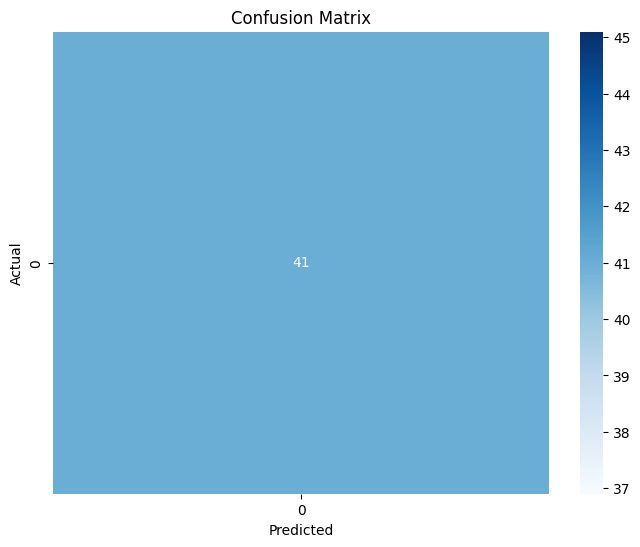

In [45]:

import numpy as np
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_classes),
            yticklabels=np.unique(y_test_classes))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

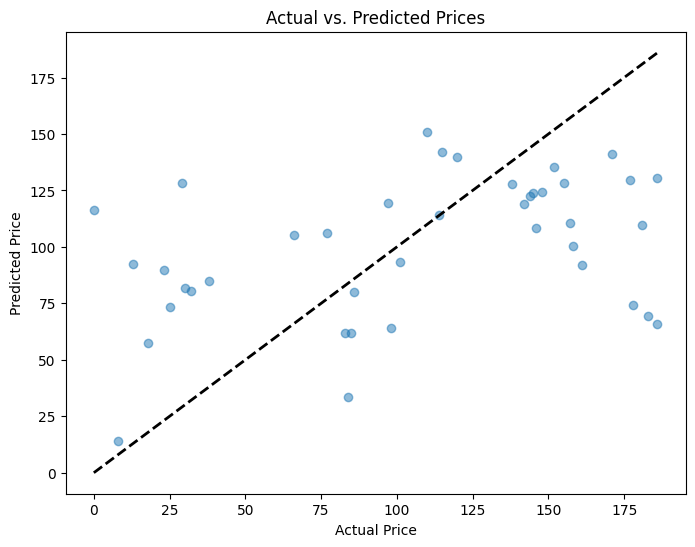

In [44]:
!pip install seaborn matplotlib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt

#Scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

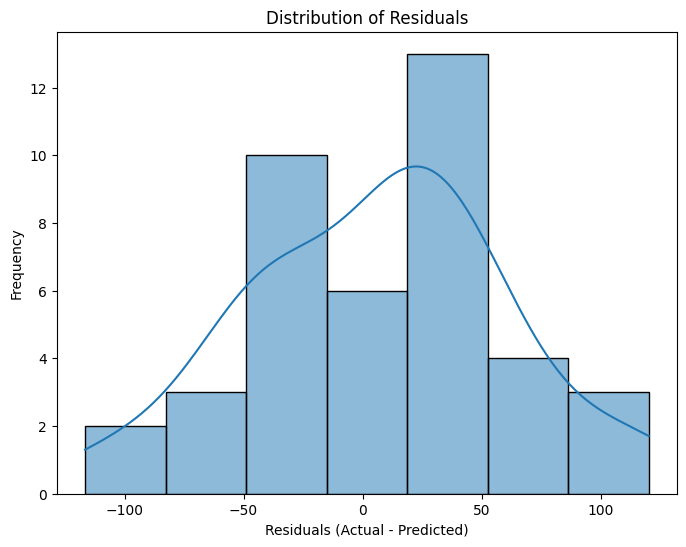

In [43]:
#Distribution of residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

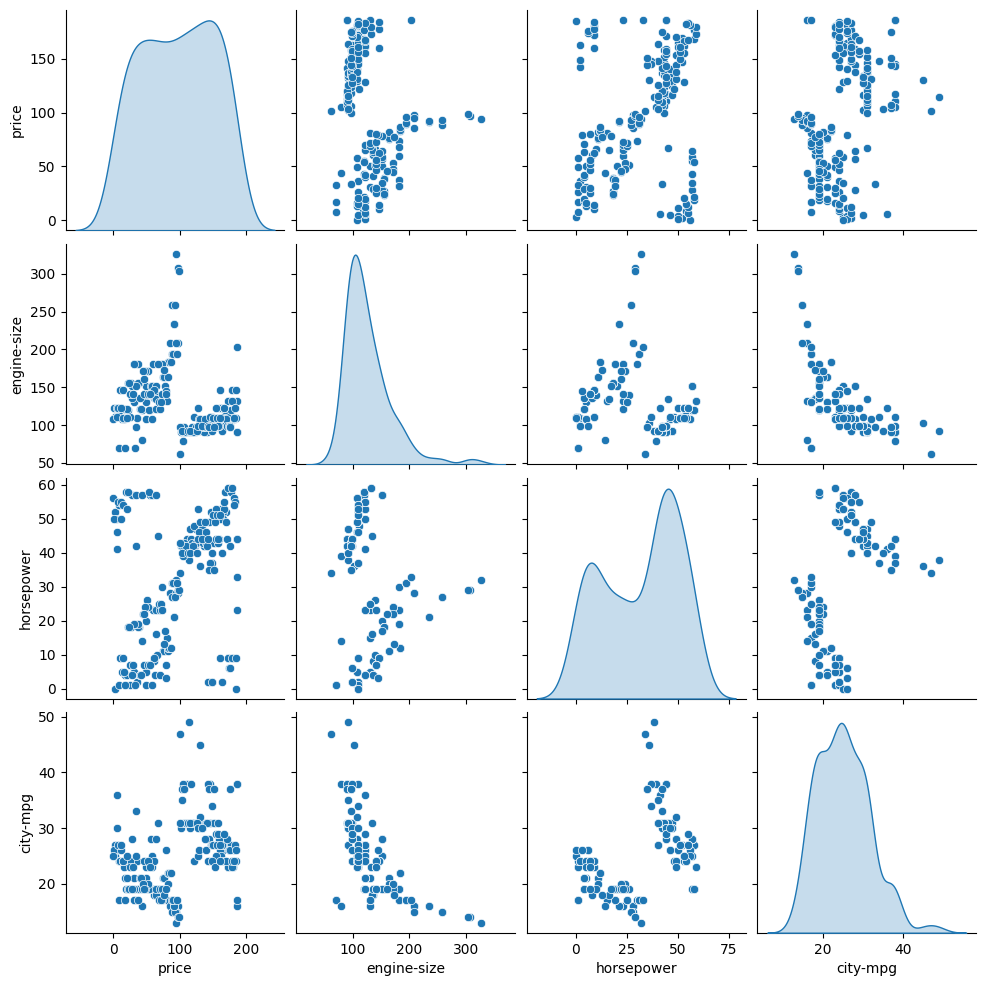

In [42]:
#pair plot
sns.pairplot(data[['price', 'engine-size', 'horsepower', 'city-mpg']], diag_kind='kde')
plt.show()


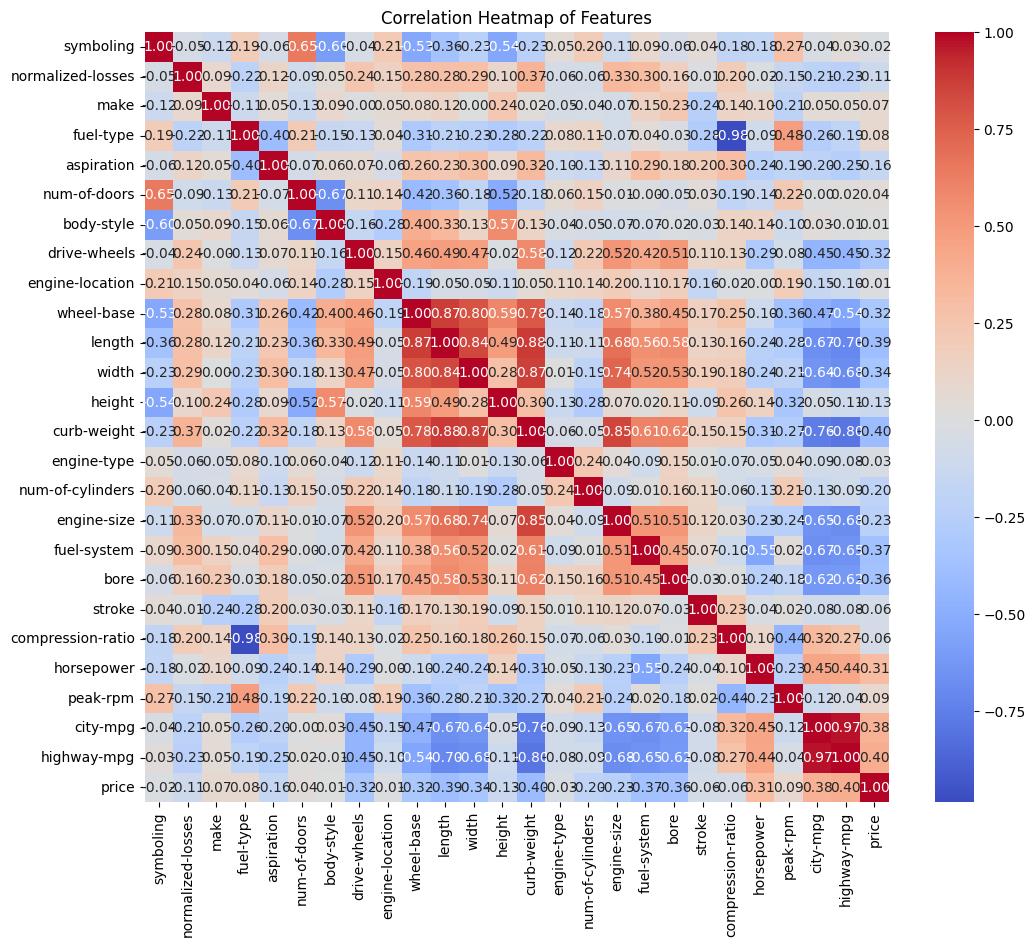

In [39]:
#Correlation heatmap of features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()